During a recent hackathon, Hacks for Humanity, which took place at Arizona
State University, I designed a very simple algorithm, to be the core of a
social network. It's goal is to provide recommendations on how to expand a

**Article note**: this article is old, archived, and was pulled from Wordpress. Expect there to be errors and issues in this article since it has not been re-reviewed.

During a recent hackathon, Hacks for Humanity, which took place at Arizona
State University, I designed a very simple algorithm, to be the core of a
social network. It's goal is to provide recommendations on how to expand a
network. The social networking algorithm finds people you likely know based on
your skills, and how far they are from you in your friend circle. This is a
rather simple algorithm, but could be a starting point for something more
complex and powerful.

Below is a diagram of a possible social network. The circles represent the
individual people in the network. The network below is shown by a tree, which
will be explained below.

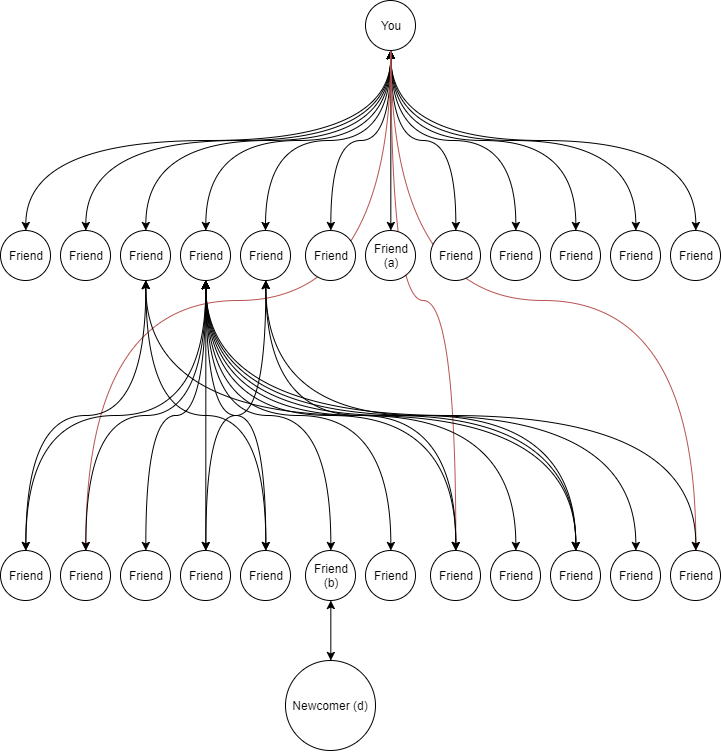

# A Social Network as a Tree

A social network can be laid out as a tree. The example above is an extremely
simple social network. In reality, everything is significantly more haywire.
Each person in the network can be seen as a node. In the diagram above, this
is a circle, with text. The text represents who they are - their name,
biodata, interests - anything that may be in their profile. The arrows are
used to represent people who know each other. These are the so-called
"connections." In the social network above, every connection is bidirectional.
You have a symmetrical relationship - you know the person as much as they know
you, in the eyes of the social network. In real world social networks, you
have the ability to follow others. This can be represented as a unidirectional
arrow. This means you know them, but they don't know you. For the purposes of
this article, we will not cover these relationships, but they are the simplest
of the relationships. In a social network, the goal is to have people (nodes)
connect with other people (nodes). However, in a real world social network,
how do you determine who to connect with? You cannot simply list everyone on
the network, because real world social networks are far too large. At the time
of this writing, a popular social network, Facebook, has about 2 billion
members. Try sifting through all of those members to figure out who you know!

# The Algorithm

In this article, we will use a very simple algorithm. The point of this
algorithm is to demonstrate the basics, not to create a replica of Facebook!
We will dive into the algorithm through examples, building up to some Python
pseudocode. We begin by providing each user a list of connections. If another
Before we get too far, let's illustrate the concept of "degree" in social
networking. The degree in your connection is how many people you need to know
in order to connect with someone. If someone is a first degree connection, you
know them directly. If someone is a second degree connection, you know a
person who knows this person. If someone is a third degree connection, you
know a person who knows a person who knows this person. Sound complex? If so,
take a look at the tree representation of a social network again:

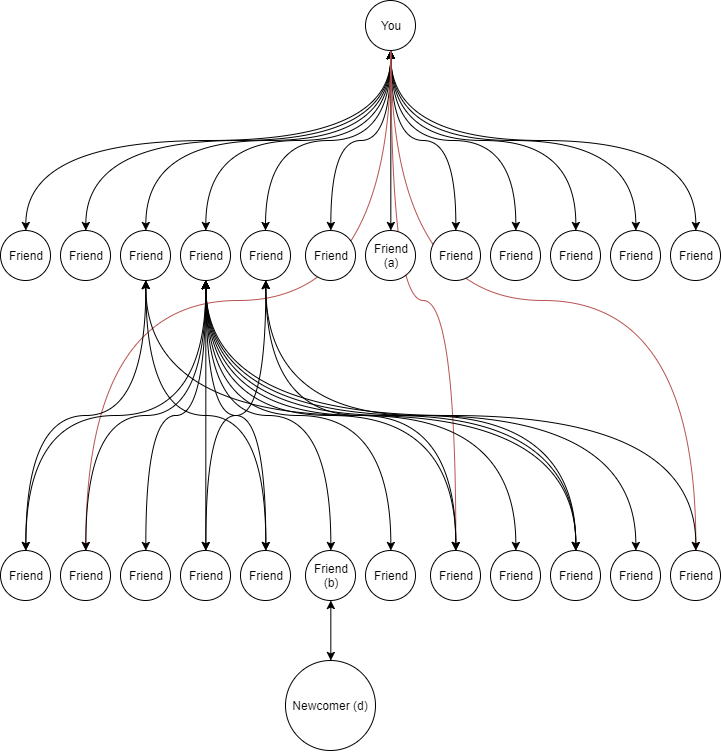

Let's say that newcomer ($d$) wants
to connect with you ($You$). Let's start by computing the degree
between the two. You are connected to ten people. Let's consider each person
you are connected to. Is newcomer in this list? No. Let's check who is
connected to each of your connections. Are they connected to newcomer? No.
Let's continue one more level. We will check each of the connections of the
connections of you. Bingo! We found newcomer! We had to check two levels of
connections lists to find newcomer. Because of this, newcomer is a third
degree connection. This quite simple, isn't it? We have effectively flattened
the diagram above into a doubly-linked linked list:

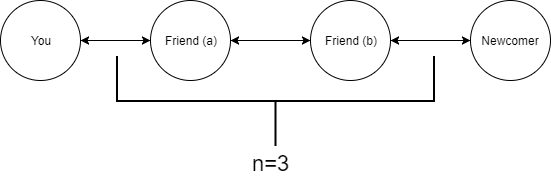

As we can
see, the degree comes from the idea that we had to search through three layers
of connections in order to find Newcomer. Because of this, we can consider the
search for the friend as a breadth first search.

# Remember, There are Loops!

If you use just a direct breadth first search, you will quickly run into a
massive issue! Your friendship is bidirectional - you are on each other's
connections lists! This is an issue because as you are navigating through a
connection's list of connections, you will start searching yourself. This will
turn into an infinite recursive loop and most likely, the social network
algorithm will crash when it runs out of memory (RAM). To solve this issue, we
will maintain a hash map of nodes, where the key is a pointer to each node.
The key can be anything, but it's best to use an integer, which is incremented
for each node. This integer should be only accessible from within the social
network software, otherwise, serious security risks may be possible (increment
by 1 to get the next user). When we check a person, we will add them to a hash
map, with a boolean value, true. This states that we have visited this node.
Before checking each node, from now on, we will check to make sure this
boolean is false.

# Lets add Some Code!